## Decision Tree
### US Dept of Ed College Scorecard
#### Question: After controlling for major and institution type, is there a correlation between college tuition costs and post-graduation earnings?

### Data

In [1]:
import pandas as pd
fos_19_21 = pd.read_csv('/content/FieldOfStudyData1920_2021_PP.csv')
merged_19 = pd.read_csv('/content/MERGED2019_20_PP.csv')
merged_20 = pd.read_csv('/content/MERGED2020_21_PP.csv')
most_recent_inst = pd.read_csv('/content/Most-Recent-Cohorts-Institution.csv')
most_recent_field = pd.read_csv('/content/Most-Recent-Cohorts-Field-of-Study.csv')

<ipython-input-1-4fb6abde40ca>:3: DtypeWarning: Columns (1503,1517,1729,1909,1910,1911,1912,1913,2376,2377) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_19 = pd.read_csv('/content/MERGED2019_20_PP.csv')
<ipython-input-1-4fb6abde40ca>:4: DtypeWarning: Columns (1729,1908,1909,1910,1911,1912,1913,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2044,2045,2046,2047,2048,2049,2050,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071,2092,2093,2094,2095,2096,2097,2098,2099,2100,2101,2102,2103,2104,2105,2106,2107,2108,2109,2110,2111,2112,2113,2114,2115,2116,2117,2118,2119,2120,2121,2122,2123,2124,2125,2126,2127,2128,2129,2130,2131,2148,2149,2150,2151,2152,2153,2154,2155,2156,2157,2158,2159,2376,2377,2958) h

In [2]:
public_colleges = fos_19_21[fos_19_21['CONTROL'] == "Public"]
private_colleges_nonprofit = fos_19_21[fos_19_21['CONTROL'] == "Private, nonprofit"]
private_colleges_profit = fos_19_21[fos_19_21['CONTROL'] == "Private, for-profit"]

### most recent inst and field files

In [3]:
most_recent_inst

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,COUNT_WNE_MALE0_P11,COUNT_WNE_MALE1_P11,GT_THRESHOLD_P11,MD_EARN_WNE_INC1_P11,MD_EARN_WNE_INC2_P11,MD_EARN_WNE_INC3_P11,MD_EARN_WNE_INDEP0_P11,MD_EARN_WNE_INDEP1_P11,MD_EARN_WNE_MALE0_P11,MD_EARN_WNE_MALE1_P11
0,100654,100200.0,1002.0,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,800.0,777.0,0.6250,36650.0,41070.0,47016.0,38892.0,41738.0,38167.0,40250.0
1,100663,105200.0,1052.0,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu/,https://tcc.ruffalonl.com/University of Alabam...,...,1811.0,1157.0,0.7588,47182.0,51896.0,54368.0,50488.0,51505.0,46559.0,59181.0
2,100690,2503400.0,25034.0,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,https://www.amridgeuniversity.edu/,https://www2.amridgeuniversity.edu:9091/,...,75.0,67.0,0.5986,35752.0,41007.0,NaN,NaN,38467.0,32654.0,49435.0
3,100706,105500.0,1055.0,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu/,finaid.uah.edu/,...,810.0,802.0,0.7810,51208.0,62219.0,62577.0,55920.0,60221.0,47787.0,67454.0
4,100724,100500.0,1005.0,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/,www.alasu.edu/cost-aid/tuition-costs/net-price...,...,1224.0,1049.0,0.5378,32844.0,36932.0,37966.0,34294.0,31797.0,32303.0,36964.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6479,49178301,4270802.0,42708.0,Wilton Simpson Technical College,Brooksville,FL,346134904,Council on Occupational Education,https://hernandoschools.org/schools/stc,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6480,49425001,2609404.0,26094.0,Valley College - Fairlawn - School of Nursing,Fairlawn,OH,443333631,Accrediting Commission of Career Schools and C...,https://www.valley.edu/,NaN,...,76.0,NaN,0.4651,26087.0,37545.0,NaN,NaN,28205.0,27499.0,NaN
6481,49501301,4247201.0,42472.0,Western Maricopa Education Center - Southwest ...,Buckeye,AZ,85326-5705,Council on Occupational Education,https://west-mec.edu/findyourhappy,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6482,49501302,4247202.0,42472.0,Western Maricopa Education Center - Northeast ...,Phoenix,AZ,85027-0000,Council on Occupational Education,https://west-mec.edu/findyourhappy,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
most_recent_inst.columns.tolist()

['UNITID',
 'OPEID',
 'OPEID6',
 'INSTNM',
 'CITY',
 'STABBR',
 'ZIP',
 'ACCREDAGENCY',
 'INSTURL',
 'NPCURL',
 'SCH_DEG',
 'HCM2',
 'MAIN',
 'NUMBRANCH',
 'PREDDEG',
 'HIGHDEG',
 'CONTROL',
 'ST_FIPS',
 'REGION',
 'LOCALE',
 'LOCALE2',
 'LATITUDE',
 'LONGITUDE',
 'CCBASIC',
 'CCUGPROF',
 'CCSIZSET',
 'HBCU',
 'PBI',
 'ANNHI',
 'TRIBAL',
 'AANAPII',
 'HSI',
 'NANTI',
 'MENONLY',
 'WOMENONLY',
 'RELAFFIL',
 'ADM_RATE',
 'ADM_RATE_ALL',
 'SATVR25',
 'SATVR75',
 'SATMT25',
 'SATMT75',
 'SATWR25',
 'SATWR75',
 'SATVRMID',
 'SATMTMID',
 'SATWRMID',
 'ACTCM25',
 'ACTCM75',
 'ACTEN25',
 'ACTEN75',
 'ACTMT25',
 'ACTMT75',
 'ACTWR25',
 'ACTWR75',
 'ACTCMMID',
 'ACTENMID',
 'ACTMTMID',
 'ACTWRMID',
 'SAT_AVG',
 'SAT_AVG_ALL',
 'PCIP01',
 'PCIP03',
 'PCIP04',
 'PCIP05',
 'PCIP09',
 'PCIP10',
 'PCIP11',
 'PCIP12',
 'PCIP13',
 'PCIP14',
 'PCIP15',
 'PCIP16',
 'PCIP19',
 'PCIP22',
 'PCIP23',
 'PCIP24',
 'PCIP25',
 'PCIP26',
 'PCIP27',
 'PCIP29',
 'PCIP30',
 'PCIP31',
 'PCIP38',
 'PCIP39',
 'PCIP40',

In [5]:
df_important = most_recent_inst[
    [
        # --- Institution Identifiers ---
        'UNITID', 'INSTNM', 'CONTROL', 'ICLEVEL',

        # --- Tuition Variables ---
        'TUITIONFEE_IN', 'TUITIONFEE_OUT',

        # --- Major Fields (Percent of completions by field - PCIP) ---
        # Keep all PCIP fields to control for majors
        *[col for col in most_recent_inst.columns if col.startswith('PCIP')],

        # --- Post-Graduation Earnings ---
        'MD_EARN_WNE_P10',  # Median earnings 10 years after entry

        # --- Additional Controls (optional but useful) ---
        'REGION',         # Geographic control
        'COSTT4_A',       # Total cost of attendance (alternate tuition proxy)
        'ADM_RATE',       # Admissions selectivity (optional proxy for quality)
        'UGDS',           # Undergraduate population size
    ]
].copy()

In [6]:
df_important = df_important.dropna()
df_important


,UNITID,INSTNM,CONTROL,ICLEVEL,TUITIONFEE_IN,TUITIONFEE_OUT,PCIP01,PCIP03,PCIP04,PCIP05,...,PCIP49,PCIP50,PCIP51,PCIP52,PCIP54,MD_EARN_WNE_P10,REGION,COSTT4_A,ADM_RATE,UGDS
0,100654,Alabama A & M University,1,1,10024.0,18634.0,0.0333,0.0157,0.0059,0.0000,...,0.0,0.0137,0.0000,0.1526,0.0000,40628.0,5,23167.0,0.6840,5196.0
1,100663,University of Alabama at Birmingham,1,1,8832.0,21216.0,0.0000,0.0000,0.0000,0.0007,...,0.0,0.0248,0.2213,0.1934,0.0080,54501.0,5,26257.0,0.8668,12776.0
3,100706,University of Alabama in Huntsville,1,1,11878.0,24770.0,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0535,0.1119,0.1945,0.0079,61767.0,5,25777.0,0.7810,6985.0
4,100724,Alabama State University,1,1,11068.0,19396.0,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0604,0.0500,0.1500,0.0104,34502.0,5,21900.0,0.9660,3296.0
5,100751,The University of Alabama,1,1,11940.0,32300.0,0.0000,0.0036,0.0000,0.0016,...,0.0,0.0210,0.1008,0.2868,0.0087,59221.0,5,31024.0,0.8006,31360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5952,497824,Evangel University-College of Online Learning,2,1,8025.0,8025.0,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0000,0.0000,0.4426,0.0000,46573.0,4,25014.0,0.9231,226.0
5953,497833,Marian University-Ancilla,2,1,19850.0,19850.0,0.0847,0.0000,0.0000,0.0000,...,0.0,0.0000,0.4746,0.2203,0.0000,58759.0,3,37074.0,0.9518,226.0
5963,498049,Arizona College of Nursing-Southfield,3,1,22826.0,22826.0,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0000,0.0000,0.0000,0.0000,34657.0,3,41092.0,1.0000,297.0
5987,498562,Commonwealth University of Pennsylvania,1,1,10848.0,18919.0,0.0000,0.0050,0.0000,0.0000,...,0.0,0.0244,0.2150,0.1782,0.0099,52416.0,2,24881.0,0.9396,9778.0


In [7]:
most_recent_field.columns.tolist()

['UNITID',
 'OPEID6',
 'INSTNM',
 'CONTROL',
 'MAIN',
 'CIPCODE',
 'CIPDESC',
 'CREDLEV',
 'CREDDESC',
 'IPEDSCOUNT1',
 'IPEDSCOUNT2',
 'DEBT_ALL_STGP_ANY_N',
 'DEBT_ALL_STGP_ANY_MEAN',
 'DEBT_ALL_STGP_ANY_MDN',
 'DEBT_ALL_STGP_EVAL_N',
 'DEBT_ALL_STGP_EVAL_MEAN',
 'DEBT_ALL_STGP_EVAL_MDN',
 'DEBT_ALL_PP_ANY_N',
 'DEBT_ALL_PP_ANY_MEAN',
 'DEBT_ALL_PP_ANY_MDN',
 'DEBT_ALL_PP_EVAL_N',
 'DEBT_ALL_PP_EVAL_MEAN',
 'DEBT_ALL_PP_EVAL_MDN',
 'DEBT_MALE_STGP_ANY_N',
 'DEBT_MALE_STGP_ANY_MEAN',
 'DEBT_MALE_STGP_ANY_MDN',
 'DEBT_MALE_STGP_EVAL_N',
 'DEBT_MALE_STGP_EVAL_MEAN',
 'DEBT_MALE_STGP_EVAL_MDN',
 'DEBT_MALE_PP_ANY_N',
 'DEBT_MALE_PP_ANY_MEAN',
 'DEBT_MALE_PP_ANY_MDN',
 'DEBT_MALE_PP_EVAL_N',
 'DEBT_MALE_PP_EVAL_MEAN',
 'DEBT_MALE_PP_EVAL_MDN',
 'DEBT_NOTMALE_STGP_ANY_N',
 'DEBT_NOTMALE_STGP_ANY_MEAN',
 'DEBT_NOTMALE_STGP_ANY_MDN',
 'DEBT_NOTMALE_STGP_EVAL_N',
 'DEBT_NOTMALE_STGP_EVAL_MEAN',
 'DEBT_NOTMALE_STGP_EVAL_MDN',
 'DEBT_NOTMALE_PP_ANY_N',
 'DEBT_NOTMALE_PP_ANY_MEAN',
 'DEBT_NOTMAL

In [8]:
columns_needed = ['UNITID','INSTNM','CONTROL','CIPCODE','CIPDESC','CREDLEV','CREDDESC','EARN_MDN_1YR','DEBT_ALL_PP_ANY_MDN']

columns_needed = most_recent_field[columns_needed].dropna()
columns_needed

,UNITID,INSTNM,CONTROL,CIPCODE,CIPDESC,CREDLEV,CREDDESC,EARN_MDN_1YR,DEBT_ALL_PP_ANY_MDN
0,100654.0,Alabama A & M University,Public,100,"Agriculture, General.",3,Bachelor's Degree,PS,PS
1,100654.0,Alabama A & M University,Public,101,Agricultural Business and Management.,3,Bachelor's Degree,PS,PS
2,100654.0,Alabama A & M University,Public,109,Animal Sciences.,3,Bachelor's Degree,PS,PS
3,100654.0,Alabama A & M University,Public,110,Food Science and Technology.,3,Bachelor's Degree,PS,PS
4,100654.0,Alabama A & M University,Public,110,Food Science and Technology.,5,Master's Degree,PS,PS
...,...,...,...,...,...,...,...,...,...
219074,497329.0,American Institute-Cherry Hill,"Private, for-profit",5106,Dental Support Services and Allied Professions.,1,Undergraduate Certificate or Diploma,25355,PS
219075,497329.0,American Institute-Cherry Hill,"Private, for-profit",5108,Allied Health and Medical Assisting Services.,1,Undergraduate Certificate or Diploma,24139,5050
219076,497329.0,American Institute-Cherry Hill,"Private, for-profit",5135,Somatic Bodywork and Related Therapeutic Servi...,1,Undergraduate Certificate or Diploma,18889,PS
219077,497338.0,Glendale Career College-North-West College-Bak...,"Private, for-profit",5108,Allied Health and Medical Assisting Services.,1,Undergraduate Certificate or Diploma,26106,7312


### Decision Tree - most recent inst

RMSE: 16288.418592466114


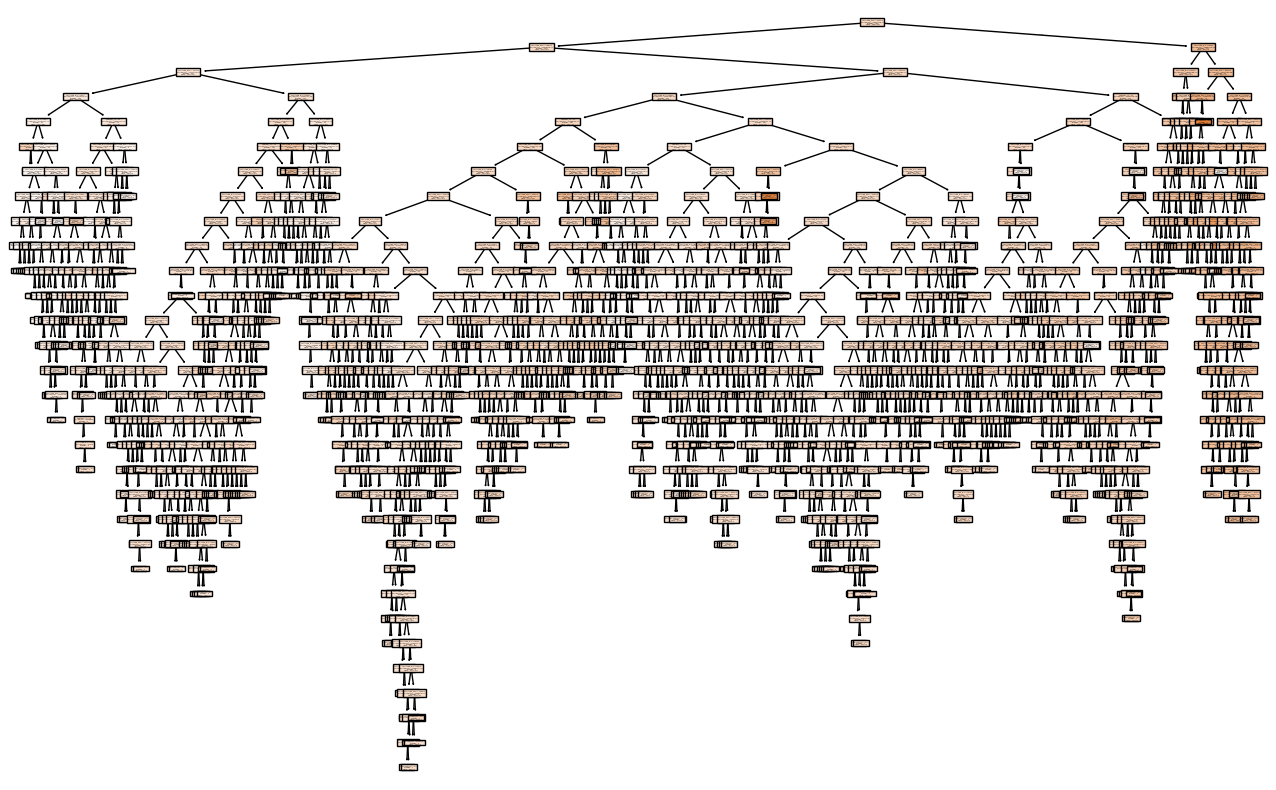

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

features = ['TUITIONFEE_IN', 'TUITIONFEE_OUT', 'CONTROL']
X = df_important[features]

X = pd.get_dummies(X, columns=['CONTROL'])

y = df_important['MD_EARN_WNE_P10']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)


y_pred = tree_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print("RMSE:", np.sqrt(mse))


from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
plt.figure(figsize=(16, 10))
plot_tree(tree_model, feature_names=X.columns, filled=True)
plt.show()

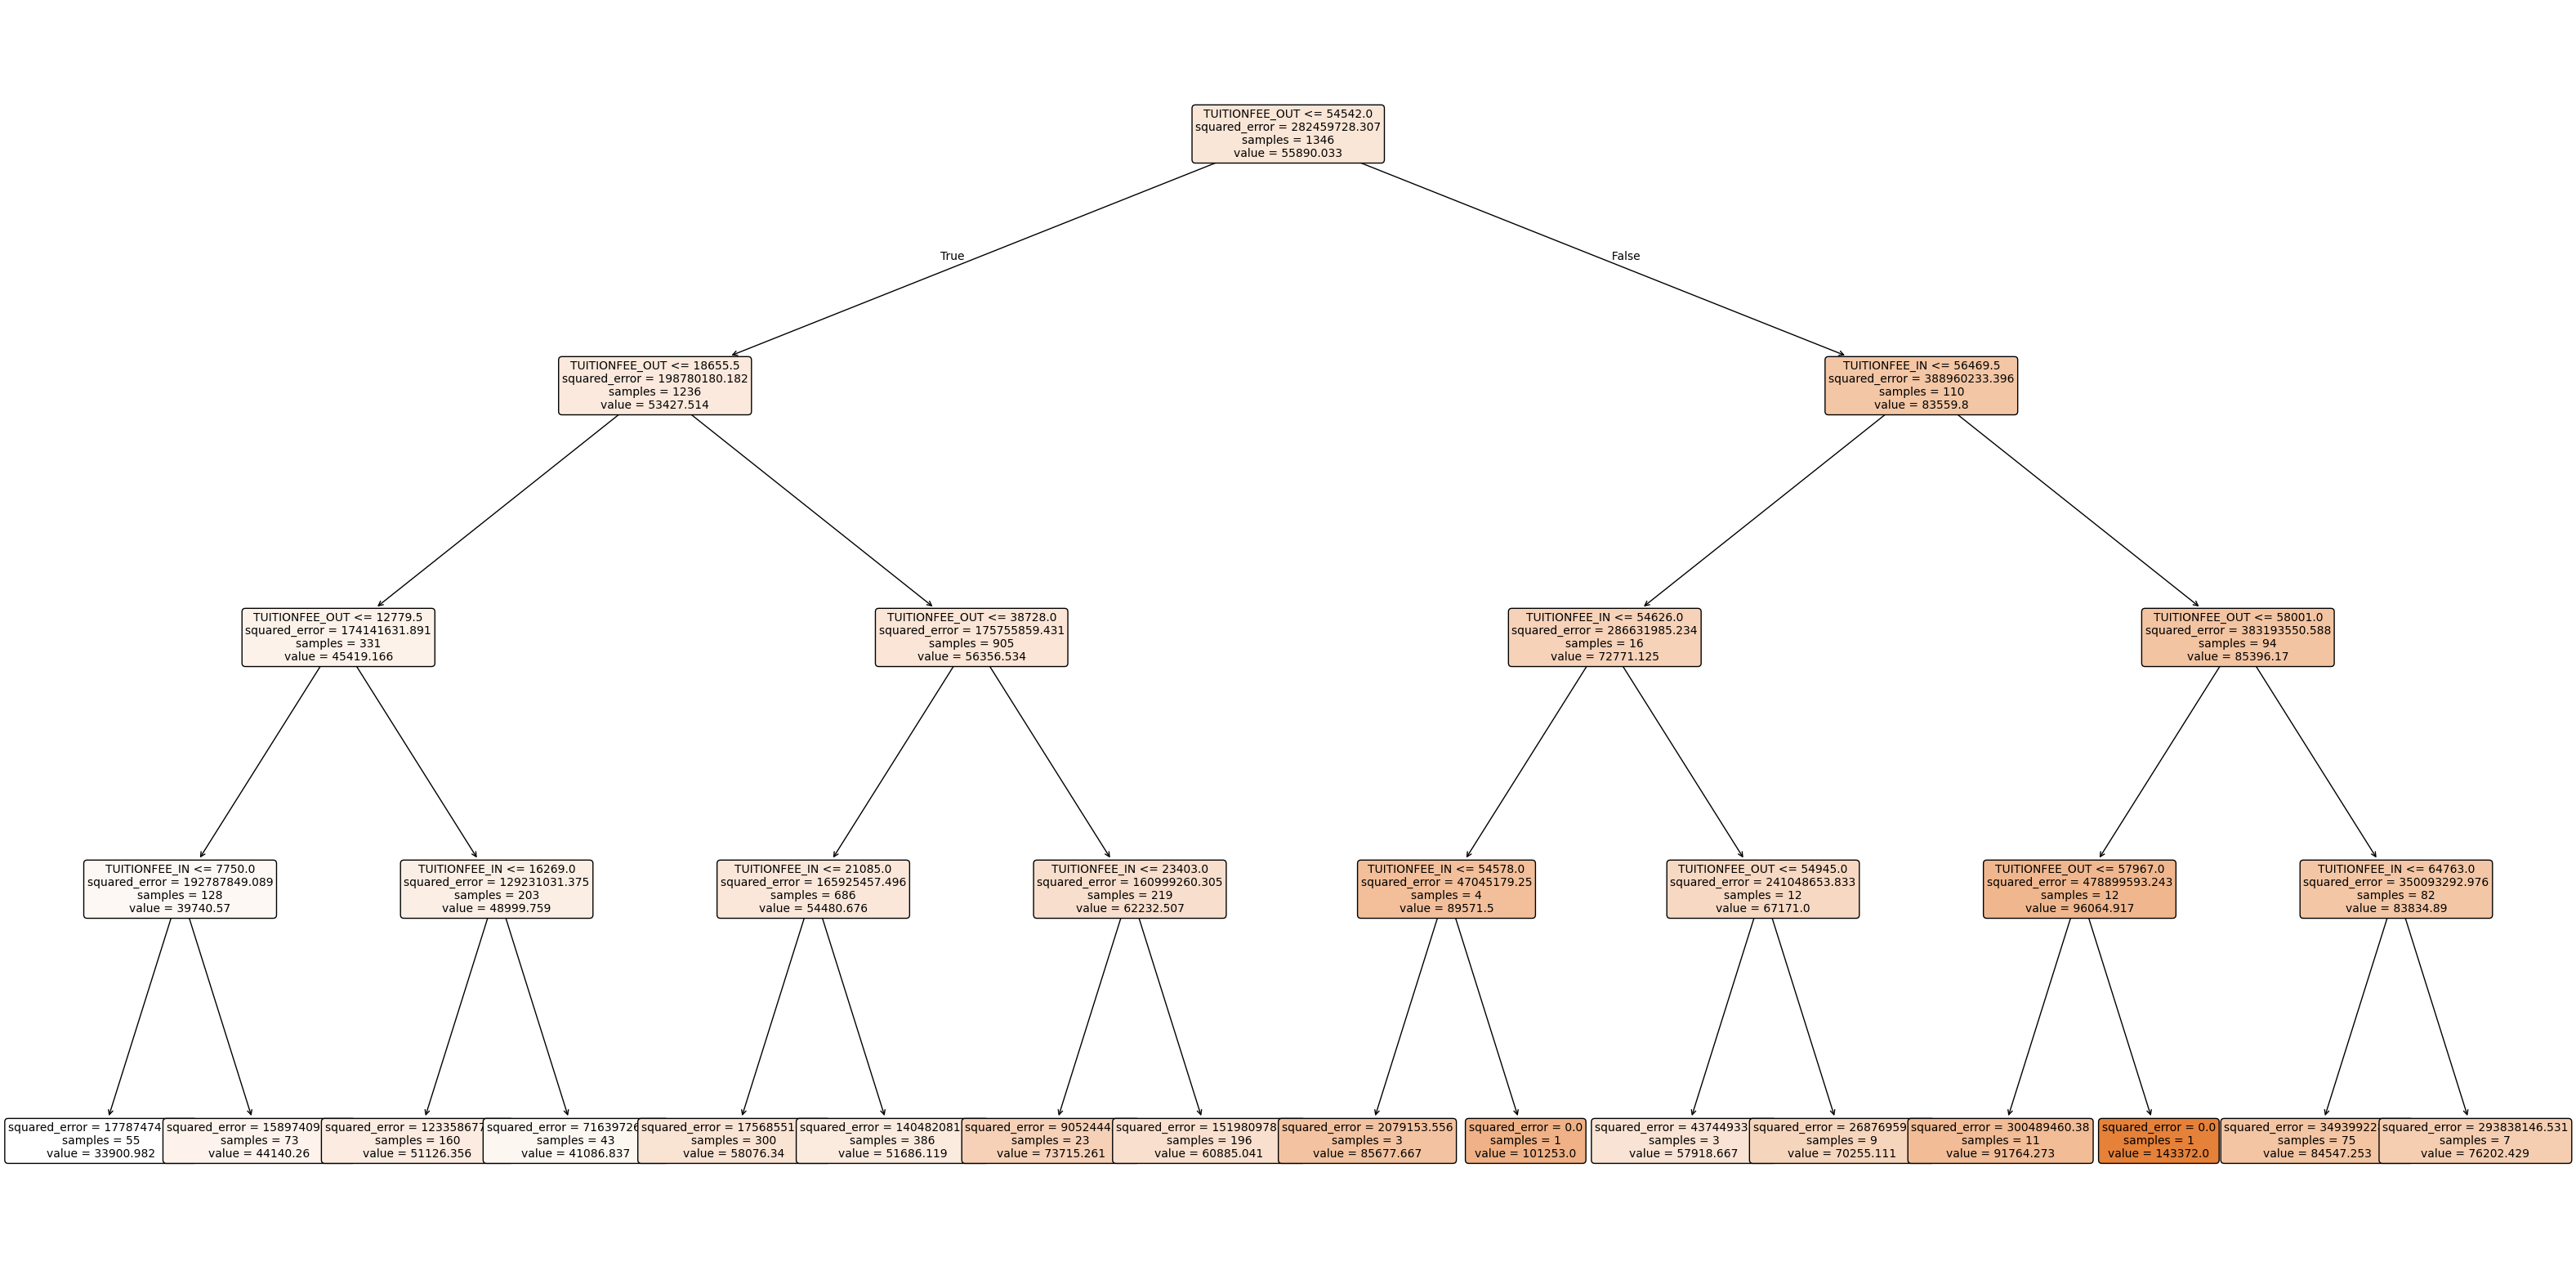

In [10]:
importances = tree.feature_importances_
top_feats = pd.Series(importances, index=X_train.columns).sort_values(ascending=False).head(10).index.tolist()

# Re-train using only the most important features
tree_small = DecisionTreeRegressor(max_depth=4, random_state=0)
tree_small.fit(X_train[top_feats], y_train)

plt.figure(figsize=(40, 20))
plot_tree(tree_small, feature_names=top_feats, filled=True, rounded=True, fontsize=10)
plt.show()

RMSE: 11769.730781474895


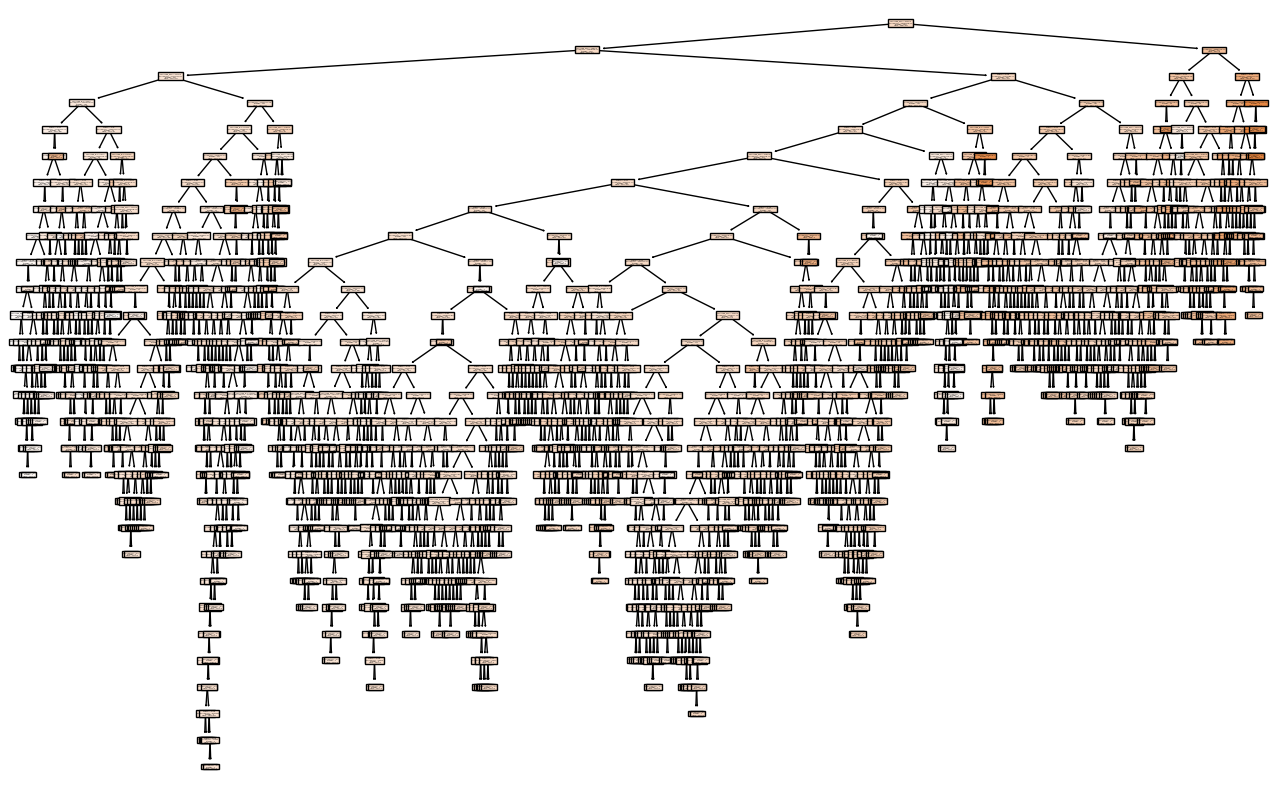

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

features = ['TUITIONFEE_IN', 'TUITIONFEE_OUT'] + [col for col in df_important.columns if col.startswith('PCIP')]
X = df_important[features]
y = df_important['MD_EARN_WNE_P10']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("RMSE:", np.sqrt(mse))

plt.figure(figsize=(16, 10))
plot_tree(tree_model, feature_names=X.columns, filled=True)
plt.show()


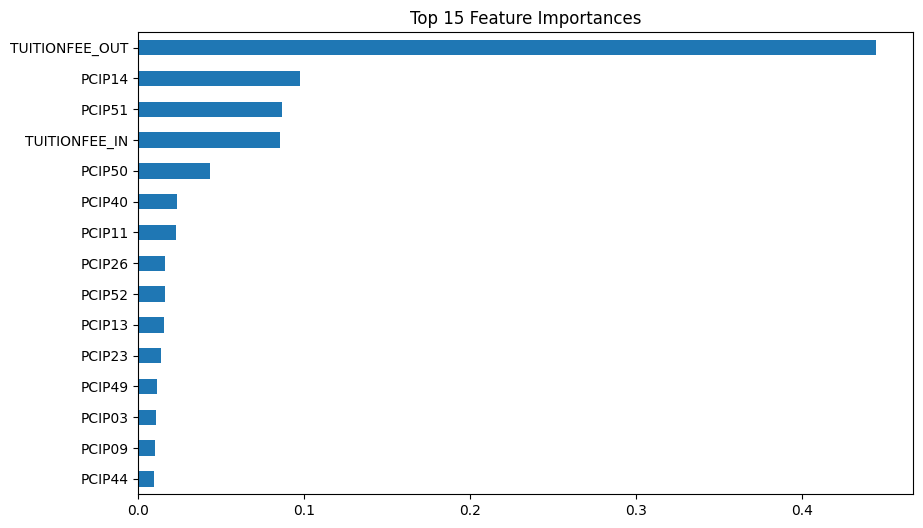

In [12]:
feature_importance = pd.Series(tree_model.feature_importances_, index=X.columns)
top_features = feature_importance.sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
top_features.plot(kind='barh')
plt.title("Top 15 Feature Importances")
plt.gca().invert_yaxis()
plt.show()

In [13]:
pcip_columns = [col for col in df_important.columns if col.startswith('PCIP')]

print(pcip_columns)

['PCIP01', 'PCIP03', 'PCIP04', 'PCIP05', 'PCIP09', 'PCIP10', 'PCIP11', 'PCIP12', 'PCIP13', 'PCIP14', 'PCIP15', 'PCIP16', 'PCIP19', 'PCIP22', 'PCIP23', 'PCIP24', 'PCIP25', 'PCIP26', 'PCIP27', 'PCIP29', 'PCIP30', 'PCIP31', 'PCIP38', 'PCIP39', 'PCIP40', 'PCIP41', 'PCIP42', 'PCIP43', 'PCIP44', 'PCIP45', 'PCIP46', 'PCIP47', 'PCIP48', 'PCIP49', 'PCIP50', 'PCIP51', 'PCIP52', 'PCIP54']


#### STEM

In [14]:
stem_majors = [col for col in X.columns if col in ['PCIP11', 'PCIP14', 'PCIP15','PCIP26','PCIP27','PCIP40','PCIP41']]
X_stem = X[stem_majors + ['TUITIONFEE_IN', 'TUITIONFEE_OUT']]

RMSE for STEM Majors: 12856.29709581394


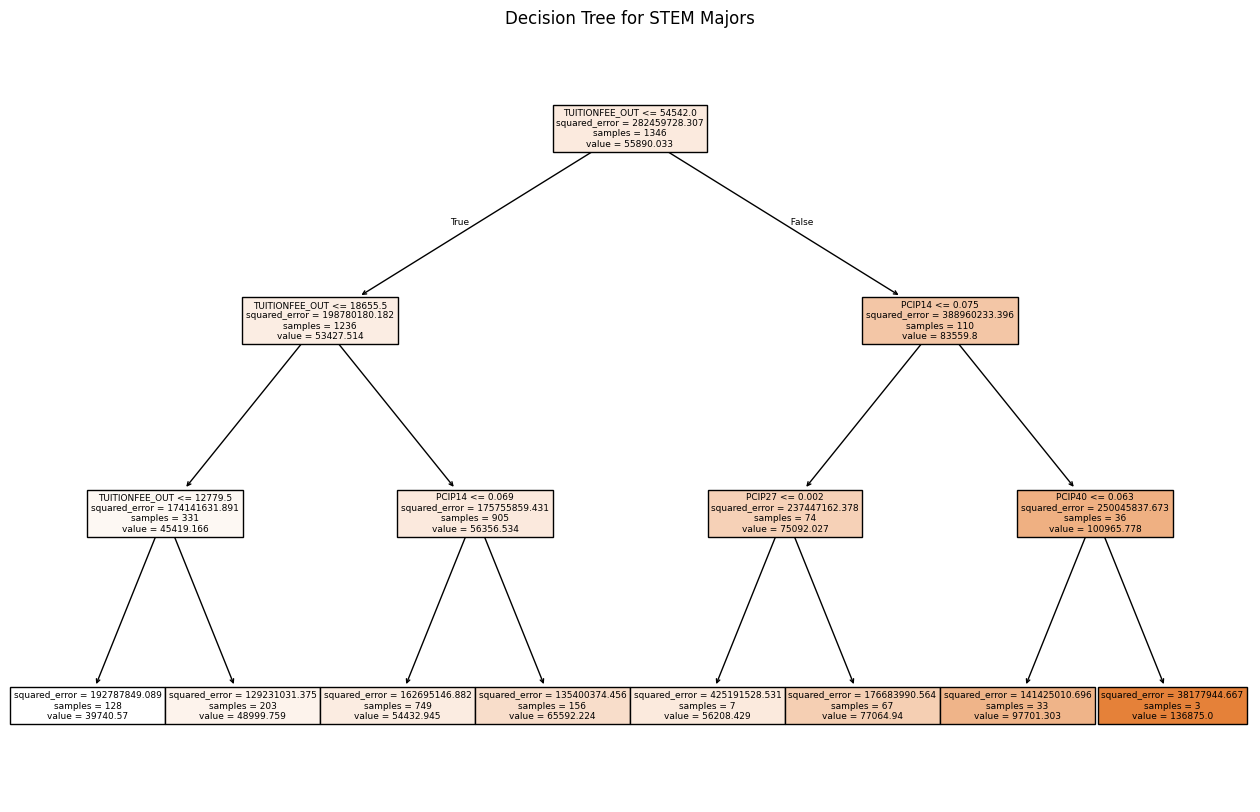

In [15]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

y_stem = df_important['MD_EARN_WNE_P10']
X_train_stem, X_test_stem, y_train_stem, y_test_stem = train_test_split(
    X_stem, y_stem, test_size=0.2, random_state=42
)

tree_model_stem = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_model_stem.fit(X_train_stem, y_train_stem)

y_pred_stem = tree_model_stem.predict(X_test_stem)

mse_stem = mean_squared_error(y_test_stem, y_pred_stem)
print("RMSE for STEM Majors:", np.sqrt(mse_stem))

plt.figure(figsize=(16, 10))
plot_tree(tree_model_stem, feature_names=X_stem.columns, filled=True)
plt.title("Decision Tree for STEM Majors")
plt.show()

#### Business

In [16]:
business_majors = [col for col in X.columns if col in ['PCIP22','PCIP51','PCIP52','PCIP10','PCIP29','PCIP43','PCIP44']]
X_business = X[business_majors + ['TUITIONFEE_IN', 'TUITIONFEE_OUT']]

RMSE for Business Majors: 13700.823611724843


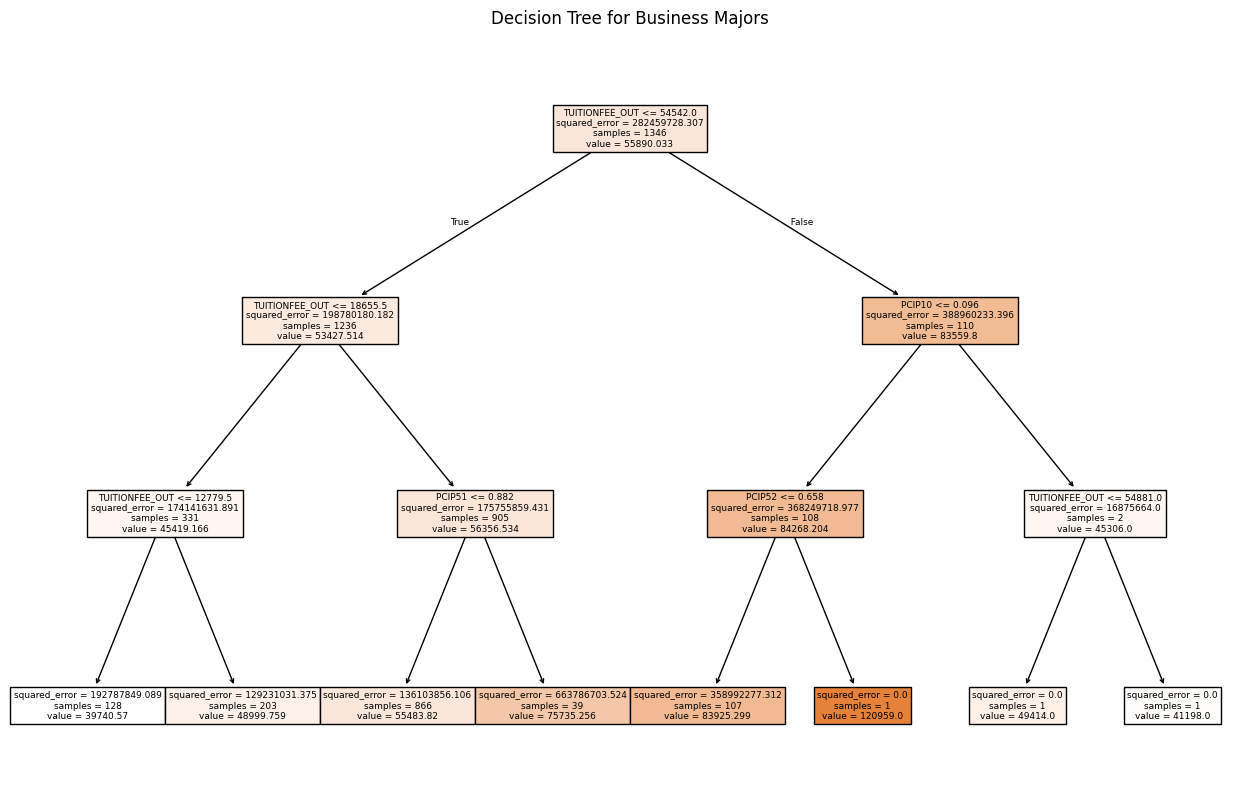

In [17]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

y_business = df_important['MD_EARN_WNE_P10']

X_train_business, X_test_business, y_train_business, y_test_business = train_test_split(
    X_business, y_business, test_size=0.2, random_state=42
)

tree_model_business = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_model_business.fit(X_train_business, y_train_business)

y_pred_business = tree_model_business.predict(X_test_business)

mse_business = mean_squared_error(y_test_business, y_pred_business)
print("RMSE for Business Majors:", np.sqrt(mse_business))

plt.figure(figsize=(16, 10))
plot_tree(tree_model_business, feature_names=X_business.columns, filled=True)
plt.title("Decision Tree for Business Majors")
plt.show()

#### Humanities

In [18]:
humanities_majors = [col for col in X.columns if col in ['PCIP05','PCIP16','PCIP23','PCIP38','PCIP39','PCIP50','PCIP54']]
X_humanities = X[humanities_majors + ['TUITIONFEE_IN', 'TUITIONFEE_OUT']]

RMSE for Humanities Majors: 12458.411572668929


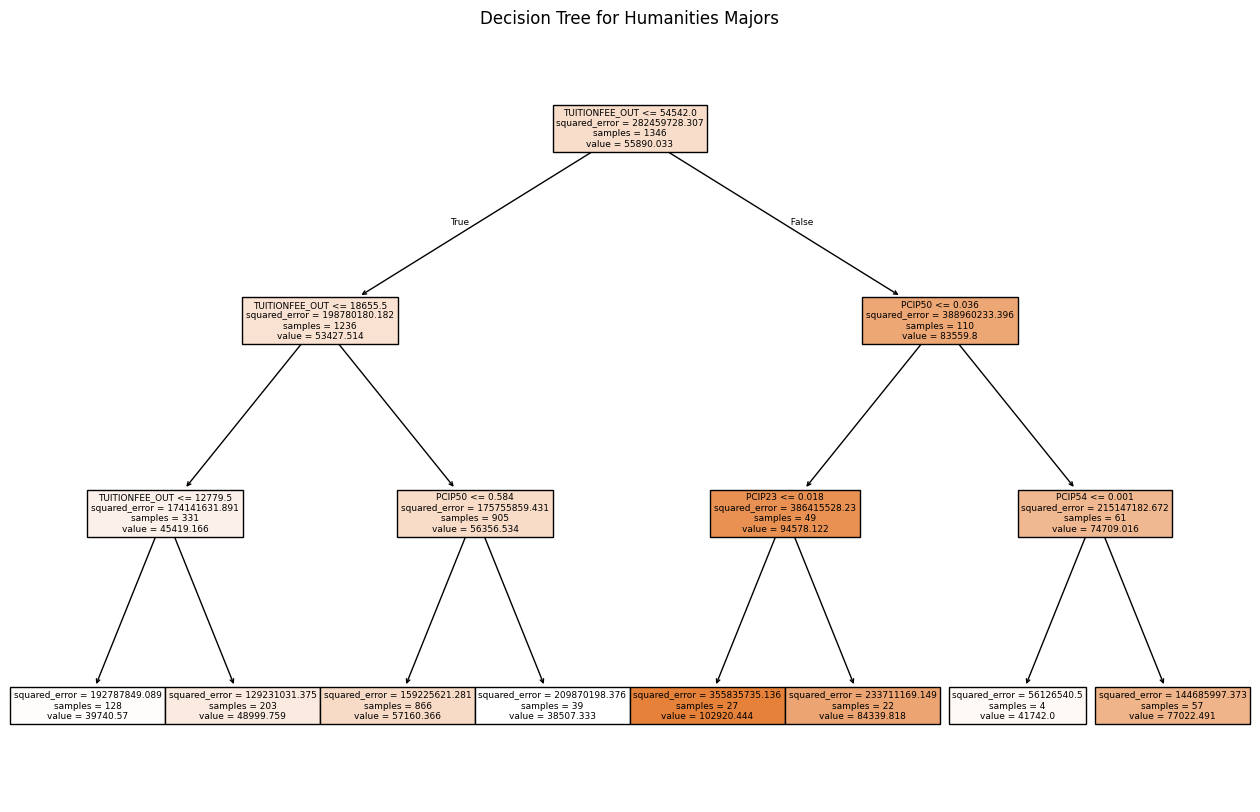

In [19]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

y_humanities = df_important['MD_EARN_WNE_P10']

X_train_humanities, X_test_humanities, y_train_humanities, y_test_humanities = train_test_split(
    X_humanities, y_humanities, test_size=0.2, random_state=42
)

tree_model_humanities = DecisionTreeRegressor(random_state=42,max_depth=3)
tree_model_humanities.fit(X_train_humanities, y_train_humanities)

y_pred_humanities = tree_model_humanities.predict(X_test_humanities)

mse_humanities = mean_squared_error(y_test_humanities, y_pred_humanities)
print("RMSE for Humanities Majors:", np.sqrt(mse_humanities))

plt.figure(figsize=(16, 10))
plot_tree(tree_model_humanities, feature_names=X_humanities.columns, filled=True)
plt.title("Decision Tree for Humanities Majors")
plt.show()

#### Education

In [20]:
education_majors = [col for col in X.columns if col in ['PCIP13','PCIP25']]
X_education = X[education_majors + ['TUITIONFEE_IN', 'TUITIONFEE_OUT']]

RMSE for Education Majors: 13333.794983138108


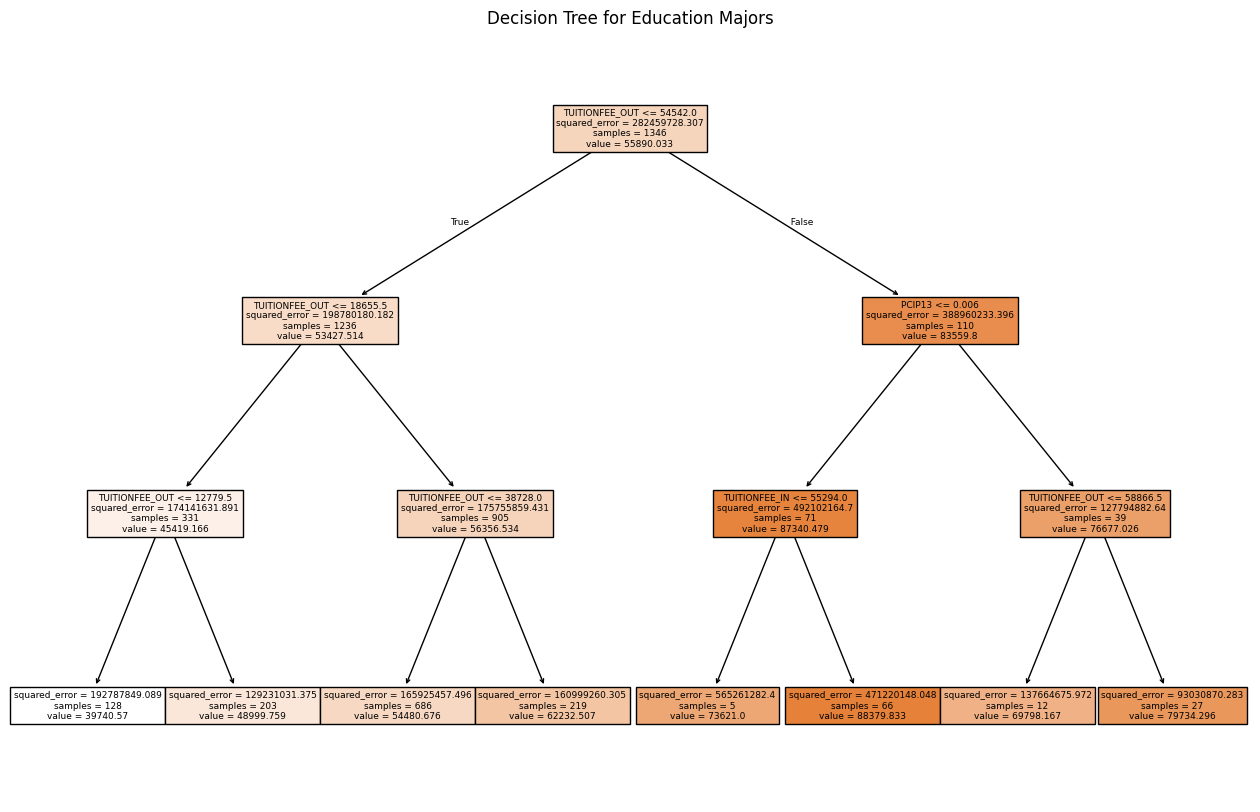

In [21]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

y_education = df_important['MD_EARN_WNE_P10']

X_train_education, X_test_education, y_train_education, y_test_education = train_test_split(
    X_education, y_education, test_size=0.2, random_state=42
)

tree_model_education = DecisionTreeRegressor(random_state=42,max_depth=3)
tree_model_education.fit(X_train_education, y_train_education)

y_pred_education = tree_model_education.predict(X_test_education)

mse_education = mean_squared_error(y_test_education, y_pred_education)
print("RMSE for Education Majors:", np.sqrt(mse_education))

plt.figure(figsize=(16, 10))
plot_tree(tree_model_education, feature_names=X_education.columns, filled=True)
plt.title("Decision Tree for Education Majors")
plt.show()

#### Trades

In [22]:
trade_majors = [col for col in X.columns if col in ['PCIP12','PCIP46','PCIP47','PCIP48','PCIP49']]
X_trade = X[trade_majors + ['TUITIONFEE_IN', 'TUITIONFEE_OUT']]

RMSE for Trade Majors: 13420.810139536912


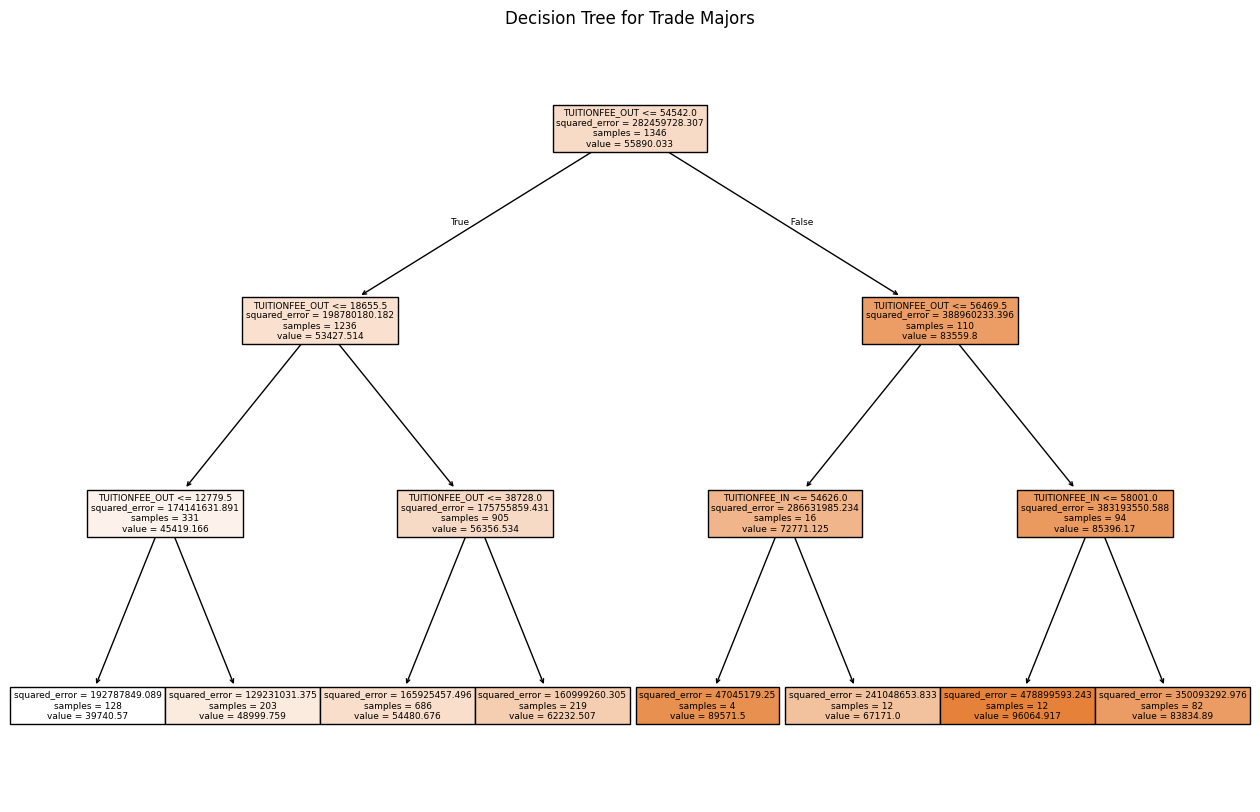

In [23]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

y_trade = df_important['MD_EARN_WNE_P10']

X_train_trade, X_test_trade, y_train_trade, y_test_trade = train_test_split(
    X_trade, y_trade, test_size=0.2, random_state=42
)

tree_model_trade = DecisionTreeRegressor(random_state=42,max_depth=3)
tree_model_trade.fit(X_train_trade, y_train_trade)

y_pred_trade = tree_model_trade.predict(X_test_trade)

mse_trade = mean_squared_error(y_test_trade, y_pred_trade)
print("RMSE for Trade Majors:", np.sqrt(mse_trade))

plt.figure(figsize=(16, 10))
plot_tree(tree_model_trade, feature_names=X_trade.columns, filled=True)
plt.title("Decision Tree for Trade Majors")
plt.show()

### Decision Tree - most recent field

In [24]:
for column in columns_needed.columns:
    columns_needed = columns_needed[~columns_needed[column].astype(str).str.contains("PS", na=False)]

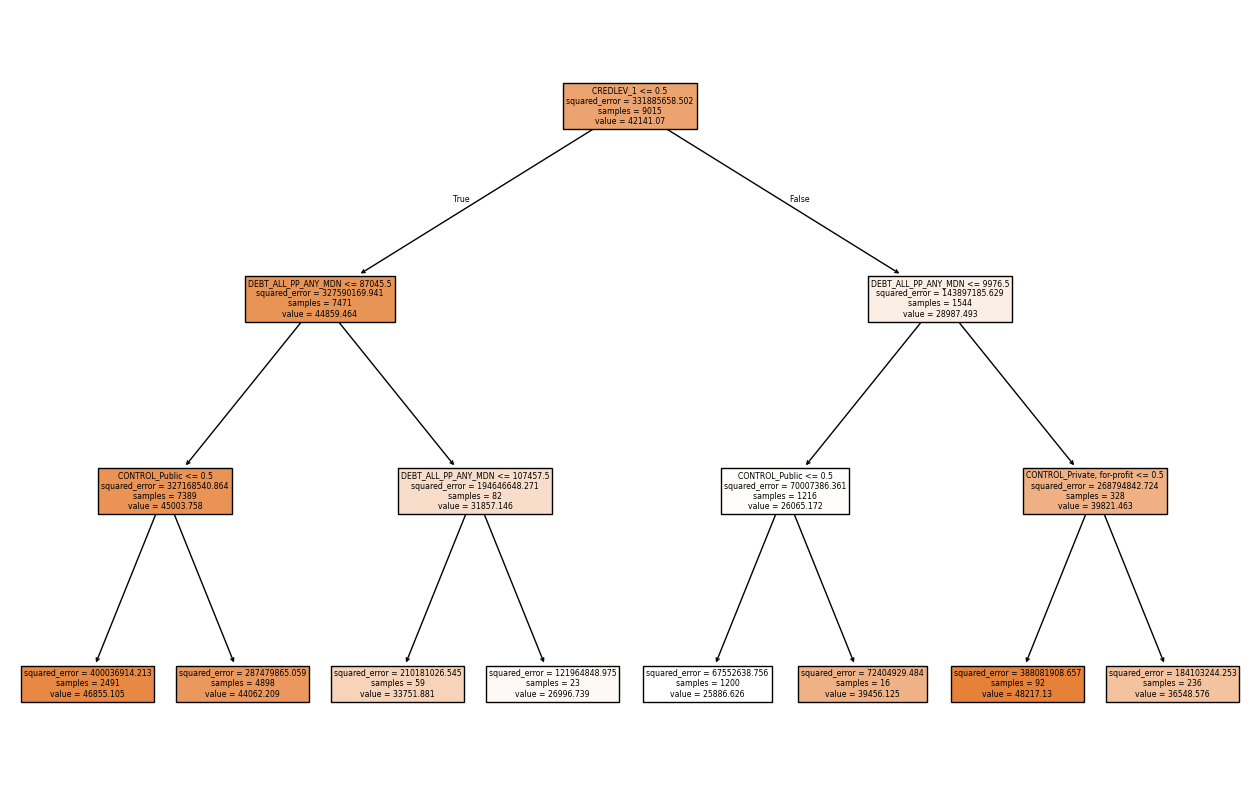

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


features = ['CONTROL', 'CREDLEV', 'DEBT_ALL_PP_ANY_MDN']
X = pd.get_dummies(columns_needed[features], columns=['CONTROL', 'CREDLEV'])
y = columns_needed['EARN_MDN_1YR']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_model = DecisionTreeRegressor(random_state=42,max_depth=3)
tree_model.fit(X_train, y_train)

plt.figure(figsize=(16, 10))
plot_tree(tree_model, feature_names=X.columns, filled=True)
plt.show()

### Filter for Colleges

In [26]:
colleges_to_keep = [
    "The University of Alabama",
    "Auburn University",
    "University of Alabama at Birmingham",
    "University of Alaska Anchorage",
    "University of Alaska Fairbanks",
    "University of Alaska Southeast",
    "University of Phoenix-Arizona",
    "Grand Canyon University",
    "Arizona State University-Tempe",
    "University of Arkansas",
    "Arkansas State University-Main Campus",
    "Arkansas Tech University",
    "University of Southern California",
    "University of California-Los Angeles",
    "University of California-Berkeley",
    "University of Colorado Boulder",
    "Colorado State University-Fort Collins",
    "Colorado Technical University-Colorado Springs",
    "University of Connecticut",
    "Yale University",
    "Central Connecticut State University",
    "University of Delaware",
    "Wilmington University",
    "Delaware Technical Community College-Terry",
    "George Washington University",
    "Georgetown University",
    "American University",
    "University of Central Florida",
    "Florida International University",
    "Miami Dade College",
    "University of Georgia",
    "Kennesaw State University",
    "Georgia State University",
    "University of Hawaii at Manoa",
    "Kapiolani Community College",
    "Leeward Community College",
    "Brigham Young University-Idaho",
    "Boise State University",
    "Idaho State University",
    "University of Illinois at Urbana-Champaign",
    "University of Illinois at Chicago",
    "Chamberlain University-Illinois",
    "Ivy Tech Community College",
    "Purdue University-Main Campus",
    "Indiana University-Bloomington",
    "Iowa State University",
    "University of Iowa",
    "Purdue University Global-Davenport",
    "University of Kansas",
    "Kansas State University",
    "Johnson County Community College",
    "University of Kentucky",
    "University of Louisville",
    "Western Kentucky University",
    "Louisiana State University and Agricultural & Mechanical College",
    "University of Louisiana at Lafayette",
    "Southeastern Louisiana University",
    "University of Maine",
    "University of Southern Maine",
    "University of New England",
    "University of Maryland-University College",
    "University of Maryland-College Park",
    "Johns Hopkins University",
    "Boston University",
    "Harvard University",
    "University of Massachusetts-Amherst",
    "Michigan State University",
    "University of Michigan-Ann Arbor",
    "Wayne State University",
    "University of Minnesota-Twin Cities",
    "Walden University",
    "Capella University",
    "University of Mississippi",
    "Mississippi State University",
    "University of Southern Mississippi",
    "University of Missouri-Columbia",
    "Missouri State University-Springfield",
    "Saint Louis Community College",
    "Montana State University",
    "The University of Montana",
    "Montana State University Billings",
    "University of Nebraska-Lincoln",
    "University of Nebraska at Omaha",
    "Metropolitan Community College Area",
    "College of Southern Nevada",
    "University of Nevada-Las Vegas",
    "University of Nevada-Reno",
    "Southern New Hampshire University",
    "University of New Hampshire-Main Campus",
    "Dartmouth College",
    "Rutgers University-New Brunswick",
    "Montclair State University",
    "Rowan University",
    "University of New Mexico-Main Campus",
    "Central New Mexico Community College",
    "New Mexico State University-Main Campus",
    "New York University",
    "University at Buffalo",
    "Columbia University in the City of New York",
    "North Carolina State University at Raleigh",
    "University of North Carolina at Chapel Hill",
    "University of North Carolina at Charlotte",
    "University of North Dakota",
    "North Dakota State University-Main Campus",
    "University of Mary",
    "Ohio State University-Main Campus",
    "University of Cincinnati-Main Campus",
    "Ohio University-Main Campus",
    "University of Oklahoma-Norman Campus",
    "Oklahoma State University-Main Campus",
    "Tulsa Community College",
    "Oregon State University",
    "Portland Community College",
    "Portland State University",
    "Pennsylvania State University-Main Campus",
    "Temple University",
    "University of Pittsburgh-Pittsburgh Campus",
    "University of Rhode Island",
    "Community College of Rhode Island",
    "Brown University",
    "University of South Carolina-Columbia",
    "Clemson University",
    "Trident Technical College",
    "South Dakota State University",
    "University of South Dakota",
    "Black Hills State University",
    "The University of Tennessee-Knoxville",
    "Middle Tennessee State University",
    "University of Memphis",
    "Lone Star College System",
    "Texas A & M University-College Station",
    "Houston Community College",
    "Western Governors University",
    "Utah Valley University",
    "Brigham Young University-Provo",
    "University of Vermont",
    "Community College of Vermont",
    "Champlain College",
    "Liberty University",
    "Northern Virginia Community College",
    "George Mason University",
    "University of Washington-Seattle Campus",
    "Washington State University",
    "Western Washington University",
    "American Public University System",
    "West Virginia University",
    "Marshall University",
    "University of Wisconsin-Madison",
    "University of Wisconsin-Milwaukee",
    "University of Wisconsin-Oshkosh",
    "University of Wyoming",
    "Northern Wyoming Community College District",
    "Laramie County Community College"
]

filtered_df = columns_needed[columns_needed['INSTNM'].isin(colleges_to_keep)]
filtered_df


,UNITID,INSTNM,CONTROL,CIPCODE,CIPDESC,CREDLEV,CREDDESC,EARN_MDN_1YR,DEBT_ALL_PP_ANY_MDN
66,100663.0,University of Alabama at Birmingham,Public,901,Communication and Media Studies.,3,Bachelor's Degree,33190,21676
90,100663.0,University of Alabama at Birmingham,Public,1313,Teacher Education and Professional Development...,3,Bachelor's Degree,32093,32200
120,100663.0,University of Alabama at Birmingham,Public,2401,"Liberal Arts and Sciences, General Studies and...",3,Bachelor's Degree,40968,17180
121,100663.0,University of Alabama at Birmingham,Public,2601,"Biology, General.",3,Bachelor's Degree,28127,27062
165,100663.0,University of Alabama at Birmingham,Public,4201,"Psychology, General.",3,Bachelor's Degree,30132,23239
...,...,...,...,...,...,...,...,...,...
216128,486840.0,Kennesaw State University,Public,5202,"Business Administration, Management and Operat...",3,Bachelor's Degree,52766,20000
216131,486840.0,Kennesaw State University,Public,5203,Accounting and Related Services.,3,Bachelor's Degree,57814,20376
216137,486840.0,Kennesaw State University,Public,5208,Finance and Financial Management Services.,3,Bachelor's Degree,54428,15574
216141,486840.0,Kennesaw State University,Public,5214,Marketing.,3,Bachelor's Degree,47158,13705


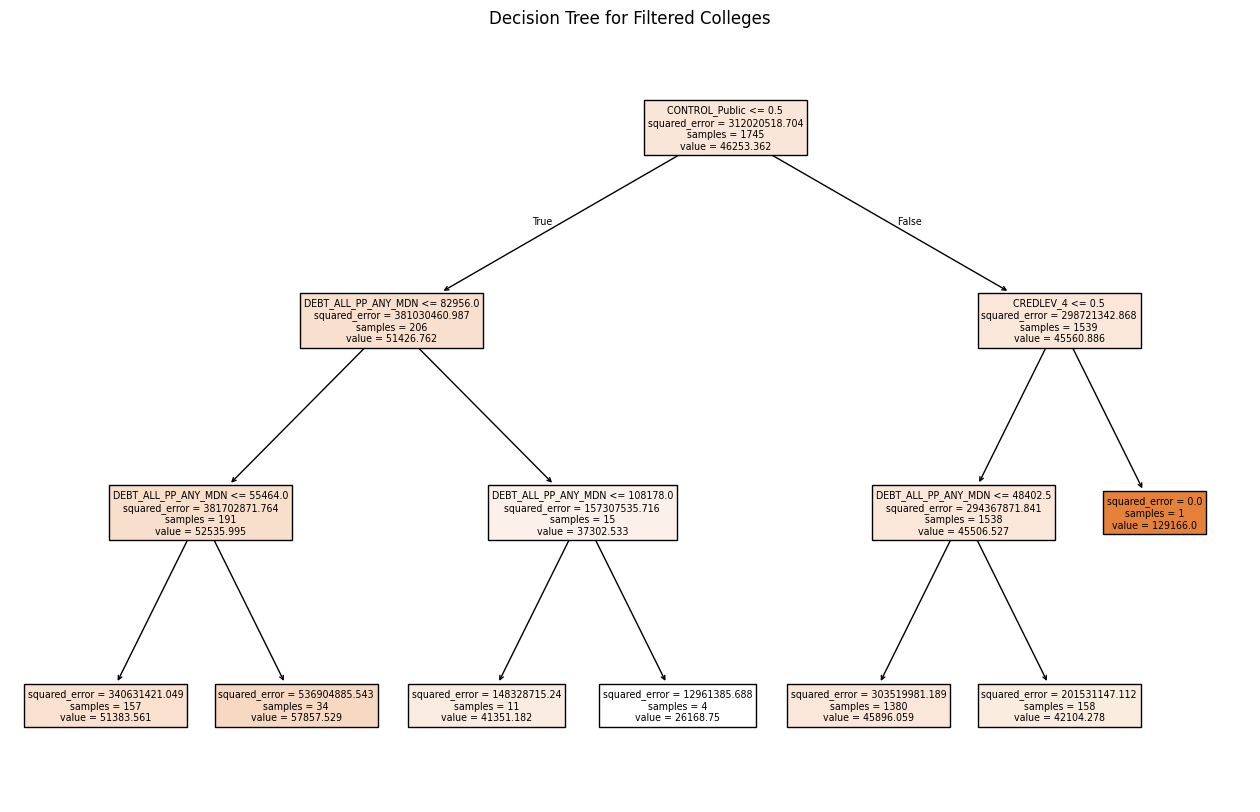

RMSE: 16895.970224377845


In [27]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np


filtered_df = columns_needed[columns_needed['INSTNM'].isin(colleges_to_keep)]

features = ['CONTROL', 'CREDLEV', 'DEBT_ALL_PP_ANY_MDN']
X = pd.get_dummies(filtered_df[features], columns=['CONTROL', 'CREDLEV'])
y = filtered_df['EARN_MDN_1YR']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_model = DecisionTreeRegressor(random_state=42, max_depth=3)  # Adjust max_depth as needed
tree_model.fit(X_train, y_train)

plt.figure(figsize=(16, 10))
plot_tree(tree_model, feature_names=X.columns, filled=True)
plt.title("Decision Tree for Filtered Colleges")
plt.show()

y_pred = tree_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("RMSE:", np.sqrt(mse))